# El Nino

In this example we use PalmSim to explore the **repurcusions of an El Nino** on a southeast asian oil palm plantation.

To be specific, we will consider the region of **North Sumatra**.

Note, this is an illustrative example using hypothetical weather data. To do the actual calculation one needs the actual weather data for the plantation site one is interested in.

### On the climate

It turns out that during an El Nino (the warm phase of the El Nino South Oscillation (ENSO)) Southeast Asia is likely to experience drought, which is also associated with forest fires and thus haze. 

### What we expect

#### Drought responses

We believe that oil palm responds to **drought** primarily via

    1. Increased bunch abortion (bunch failure) --- around 2 months after anthesis.
    2. Increased inflorescence abortion (less bunch initiation) --- around 2 months before anthesis.
    3. Decrease in the female:male sex ratio at sex determination --- around 11 months after inflorescence initiation.
    
We expect these responses to result in a **decrease in bunch count** with the following time-lags.
 
     1. Around 4 months after the drought, related to bunch abortion.
     2. Around 8 months after the drought, related to inflorescence abortion.
     3. Around 2 years after the drought, related to sex differentiation.

#### Haze response
    
Furthermore, we expect changes in **light** condition under haze since there is

    a. Less light overall
    b. Relatively more diffuse light.
    
Thus we expect less photosynthesis and a lower bunch weight in the period following the haze.
  
Note, there might well be a bunch count response to decrease in light alone, however as this is not believed to be a primary factor it is for the moment not considered.

### This Example   

This example has the following outline:

    1. We have a look at the input **weather data**.
    2. We consider bunch yield under **haze**.
    3. We consider bunch yield under **drought** and haze.
 

## Weather data

Most crop simulations require weather input data. Most commonly:
    - Solar irradiance (MJ/m2/day)
    - Precipation (mm/month)
    
And less important
    - Days with rain (1/month)
    
This demo comes with weather data files which can be found in the inputs folder.
    
**Note, these input files can for instance be opened/altered in Excel.**

In [19]:
# import pandas --- spreadsheet library
import pandas as pd

# import matplotlib --- plotting library
import matplotlib.pyplot as plt 

# read-in the csv-file
weather_data = pd.read_csv('./input/North Sumatra.csv',index_col='Date')
weather_data.index = pd.to_datetime(weather_data.index)

# For this example we "create" extreme El Nino weather
# We lower the precipitation in 1997.
weather_data.loc['1997-01':'1997-03',['precip (mm/day)']] *= 0.1
# Aswell as the solar radiation strength.
weather_data.loc['1997-01':'1997-3',['solar (MJ/m2/day)']] *= 0.8

In [20]:
# Let us view the weather data in the spreadsheet
weather_data['1997':'1997'][['solar (MJ/m2/day)','precip (mm/day)']]

,solar (MJ/m2/day),precip (mm/day)
Date,,
1997-01-01,11.920000,0.999103
1997-01-02,12.000000,1.029390
1997-01-03,12.080000,1.059677
1997-01-04,12.080000,1.059677
1997-01-05,12.080000,1.059677
1997-01-06,12.080000,1.059677
1997-01-07,12.080000,1.059677
1997-01-08,12.080000,1.059677
1997-01-09,12.080000,1.059677


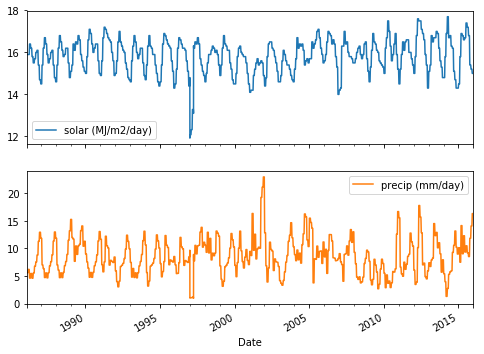

In [21]:
plots = weather_data.plot(subplots=True,figsize=(8,6))

Already quite interesting in itself. Note the seasonal rhythms.

Now note, the **reduced solar power** in 1997:

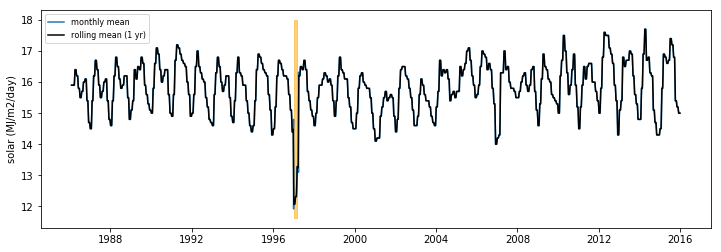

In [22]:
from plotting import tsplot, add_highlight

f,ax = tsplot(weather_data,'solar (MJ/m2/day)')
add_highlight(ax, x=['1997-01','1997-03'])

Likewise note the **reduced precipitation** in 1997:

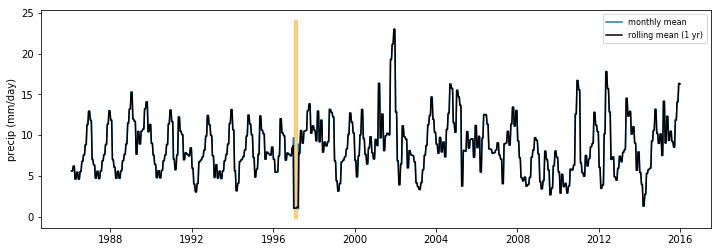

In [23]:
f,ax = tsplot(weather_data,'precip (mm/day)')
add_highlight(ax, x=['1997-01','1997-03'])

## PalmSim

Now let us **run PalmSim** given the **solar radiation data**.


In [39]:
import sys

sys.path.append('..')

from palmsim import PalmField

year_of_planting = weather_data.index.year[0]

# 1. Initialize the model
p = PalmField(year_of_planting=year_of_planting)

# 2. Couple the solar radiation data:
p.weather.radiation_series = weather_data['solar (MJ/m2/day)']

# 3. Run the model
df1 = p.run(duration=365*30)

#### Viewing the results

Running PalmSim returns a spreadsheet which can be viewed directly and can be saved as an Excel spreadsheet (.csv).

Let us visualize the results directly.

Note, to save the file such that it can be opened in e.g. excel simply write and run a piece of code

```python
df1.to_csv(filepath)
```

where filepath is where you want the file to appear e.g. 'output.csv'.

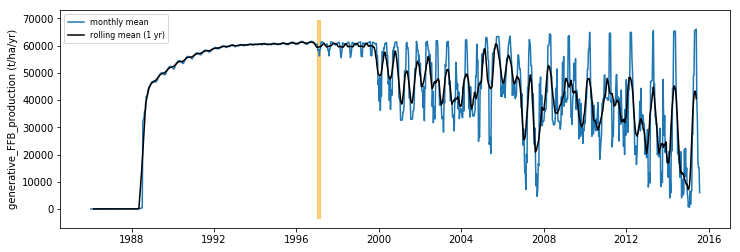

In [40]:
f,ax = tsplot(df1,'generative_FFB_production (t/ha/yr)')
add_highlight(ax,x=['1997-01','1997-03'])

Note the dip due to haze (reduced radiation) alone!

### Drought response

Just now we only considered solar radiation weather data.

Let us consider the drought response by coupling the precipitation data.

In [34]:
# 1. Initialize the model
p = PalmField(year_of_planting=year_of_planting)

# 2. Couple weather data
p.weather.radiation_series = weather_data['solar (MJ/m2/day)']
p.weather.rainfall_series = weather_data['precip (mm/day)'] # <-------------

# 3. Run the model
df2 = p.run(duration=365*30)

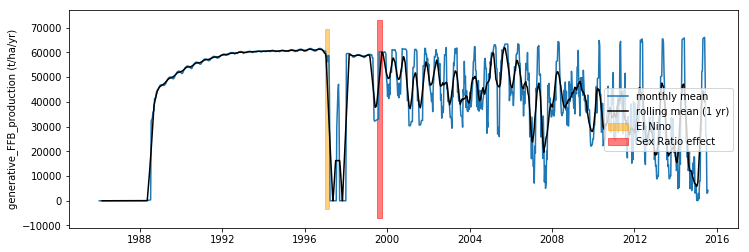

In [35]:
f,ax = tsplot(df2,'generative_FFB_production (t/ha/yr)')
add_highlight(ax,x=['1997-01','1997-03'],label='El Nino')
add_highlight(ax,x=['1999-7','1999-10'],color='red',label='Sex Ratio effect')
ax.legend(loc='right')

What we observe is a dip in the bunch count around 2 years after the peak of the drought (it takes some time for the drought to set in).

Let us consider the underlying mechanism by considering the

    - Soil water deficit (exceedance)
    - Female fraction

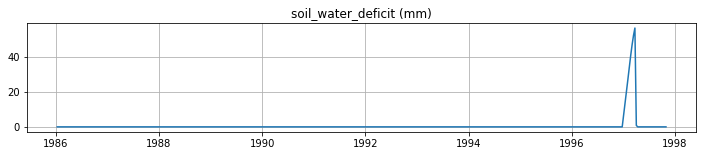

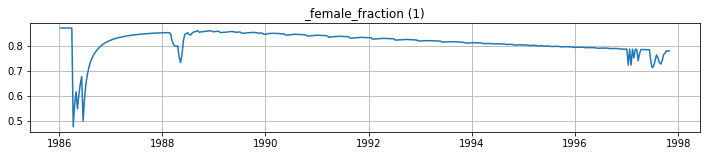

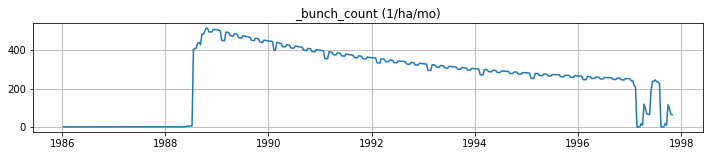

In [28]:
cs = ['soil_water_deficit (mm)','generative_female_fraction (1)','generative_bunch_count (1/ha/mo)']

for c in cs:
    f,ax = plt.subplots(figsize = (12,2))
    ax.plot(df2[c])
    ax.set_title(c.replace('generative',''))
    ax.grid()
    

To study the effect of soil water deficit in isolation,

let us run the simulation with **constant solar radiation**!

In [29]:
# 1. Initialize the model
p = PalmField(year_of_planting=year_of_planting)

# 2. Couple weather data
p.weather.radiation = weather_data['solar (MJ/m2/day)'].values.mean()
p.weather.rainfall_series = weather_data['precip (mm/day)']

# 3. Run the model
df3 = p.run(duration=365*30)

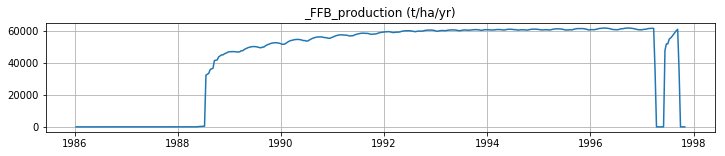

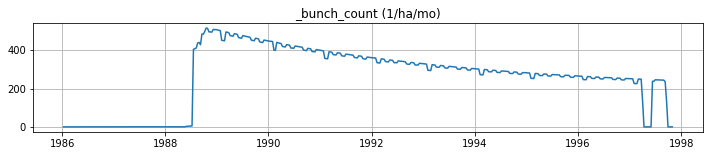

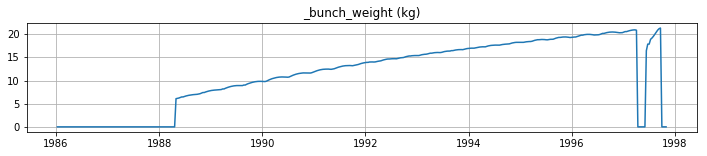

In [30]:
cs = ['generative_FFB_production (t/ha/yr)',
      'generative_bunch_count (1/ha/mo)',
      'generative_bunch_weight (kg)']

for c in cs:
    f,ax = plt.subplots(figsize = (12,2))
    ax.plot(df3[c])
    ax.set_title(c.replace('generative',''))
    ax.grid()

Note the increase in bunch weight as a response to their being less bunches but ample solar radiation/water and thus sugars.

#### Bunch and inflorescence abortion

We assume that bunch abortion and inflorescence abortion are a secondary drought response which only occurs given real stress which is less clear.

We assume that bunch abortion and inflorescence abortion only occur when there is a significant water deficit of around 200 mm.

To examplerize this consider a more severe drought and observe the modelled consequences.

In [31]:
# read-in the csv-file
weather_data = pd.read_csv('./input/North Sumatra.csv',index_col='Date')
weather_data.index = pd.to_datetime(weather_data.index)

# For this example we "create" extreme El Nino weather

# We lower the precipitation in 1997 --- now a 3 month extreme drought period.
weather_data.loc['1997-01':'1997-04',['precip (mm/day)']] *= 0

In [36]:
# 1. Initialize the model
p = PalmField(year_of_planting=year_of_planting)

# 2. Couple weather data
p.weather.radiation = weather_data['solar (MJ/m2/day)'].values.mean()
p.weather.rainfall_series = weather_data['precip (mm/day)']

# 3. Run the model
df4 = p.run(duration=365*30)

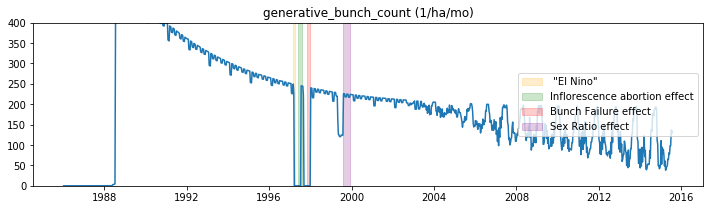

In [38]:
f,ax = plt.subplots(figsize=(12,3))

c = 'generative_bunch_count (1/ha/mo)'

xs = df4[c].index
ys = df4[c].values

ax.plot(xs,ys)
ax.set_title(c)
ax.set_ylim(0,400)

add_highlight(ax,['1997-3','1997-4'],alpha=0.2,label=' "El Nino" ')
add_highlight(ax,['1997-6','1997-8'],alpha=0.2,color='green',label='Inflorescence abortion effect')
add_highlight(ax,['1997-11','1998-1'],alpha=0.2,color='red',label='Bunch Failure effect')
add_highlight(ax,['1999-8','1999-12'],alpha=0.2,color='purple',label='Sex Ratio effect')

ax.legend(loc='right')

Here the lag-effects of the sex ratio -- it takes time before the drought stress shows as less yield -- and the other stress responses clearly shows.

Note, it could well be that in reality the stress responses are more/less severe, the responses used at this moment work for Ghana -- it would be very interesting/publication worthy to also study such (high time resolution) data for an actual site in e.g. North Sumatra and determine the effect severity! 

#### Conclusion

This concludes this example. If you are interested in drought response be sure to walk through the **"water-limited yield"** example.
